# Implementation Details
1. Explore the dataset to understand the characteristics and distributions of different features.
2. Perform data preprocessing on the dataset by cleaning the data, handling missing values,outliers, and feature scaling.
3. The dataset provided to you contains 23 different classes (attack types). You need to convert it to 5-classes. (Hint: See the file “Attack_types.txt”)
4. Identify the most relevant features for classification using technique such as correlation analysis.
5. The next step is to use the updated dataset for classification. Use the following algorithm to perform classification.

# 1. Exploring the dataset to understand features.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report,precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Read in the attack file 
attack_types = pd.read_csv('Attack_types.txt') 

# Viewing the first few rows of the dataset
attack_types

,attack_category,attack_type
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos
5,teardrop,dos
6,smurf,dos
7,land,dos
8,neptune,dos
9,pod,dos


In [3]:

# Read in the dataset
df = pd.read_csv('Dataset.txt')

# Viewing the first few rows of the dataset
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:

# Check the shape of the dataset
print(df.shape)


(125973, 43)


In [5]:
# Check the data types of each column
print(df.dtypes)


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
unique_counts = df.nunique()
print(unique_counts)


duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [7]:
unique_values = df['protocol_type'].unique()
print(unique_values)

['tcp' 'udp' 'icmp']


In [8]:

# loop through each column and get the unique values
for column in df.columns:
    unique_values = df[column].unique()
    #if len(unique_values) < 50:
    print(f"Column '{column}' has {len(unique_values)} unique values: {unique_values}")


Column 'duration' has 2981 unique values: [    0  5607   507 ...  5430 11680   679]
Column 'protocol_type' has 3 unique values: ['tcp' 'udp' 'icmp']
Column 'service' has 70 unique values: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
Column 'flag' has 11 unique values: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Column 'src_bytes' has 3341 unique values: [  491   146     0 ...  2816 11466  2358]
Colu

Column 'srv_rerror_rate' has 62 unique values: [0.   1.   0.03 0.1  0.2  0.25 0.08 0.11 0.33 0.43 0.5  0.07 0.14 0.62
 0.09 0.81 0.06 0.17 0.05 0.75 0.8  0.29 0.12 0.04 0.02 0.71 0.79 0.83
 0.56 0.67 0.84 0.4  0.64 0.74 0.38 0.85 0.15 0.69 0.6  0.73 0.76 0.57
 0.86 0.92 0.82 0.18 0.22 0.78 0.77 0.88 0.96 0.7  0.9  0.72 0.01 0.89
 0.55 0.87 0.95 0.13 0.58 0.3 ]
Column 'same_srv_rate' has 101 unique values: [1.   0.08 0.05 0.16 0.14 0.09 0.06 0.02 0.   0.17 0.1  0.01 0.03 0.28
 0.5  0.22 0.07 0.37 0.12 0.11 0.67 0.04 0.99 0.15 0.25 0.33 0.31 0.19
 0.27 0.97 0.43 0.18 0.24 0.4  0.13 0.46 0.23 0.42 0.44 0.21 0.2  0.35
 0.52 0.56 0.6  0.79 0.96 0.32 0.39 0.88 0.3  0.26 0.9  0.48 0.63 0.57
 0.75 0.36 0.98 0.51 0.87 0.93 0.62 0.45 0.73 0.34 0.92 0.8  0.83 0.89
 0.61 0.55 0.38 0.85 0.29 0.95 0.53 0.41 0.7  0.86 0.69 0.49 0.72 0.47
 0.74 0.64 0.77 0.65 0.58 0.54 0.59 0.71 0.78 0.91 0.94 0.82 0.81 0.66
 0.68 0.76 0.84]
Column 'diff_srv_rate' has 95 unique values: [0.   0.15 0.07 0.06 0.05 1.   0

In [9]:
# Compute summary statistics for numerical variables
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
# Print the feature names
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')

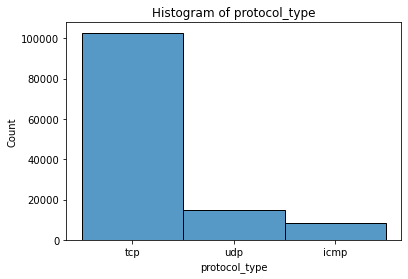

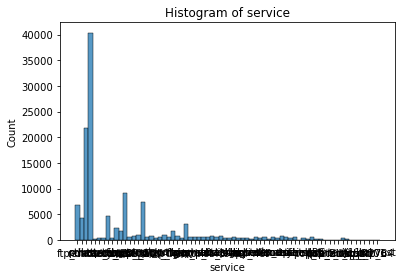

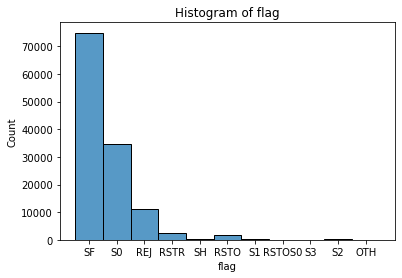

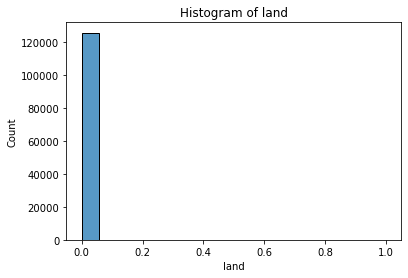

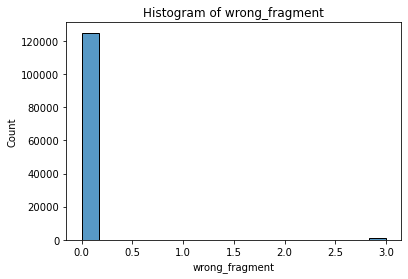

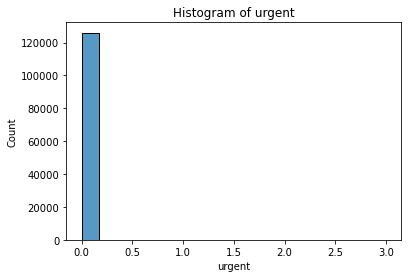

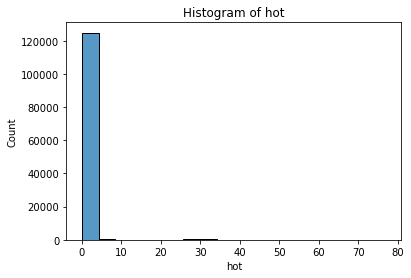

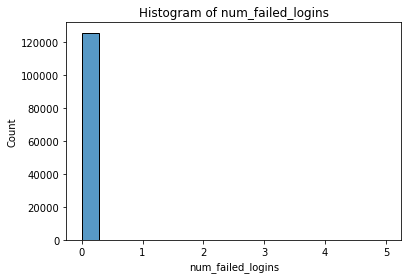

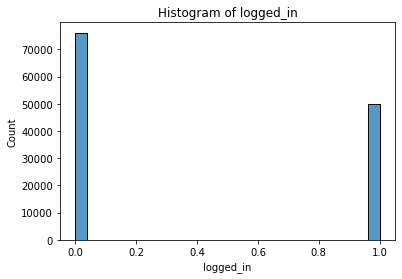

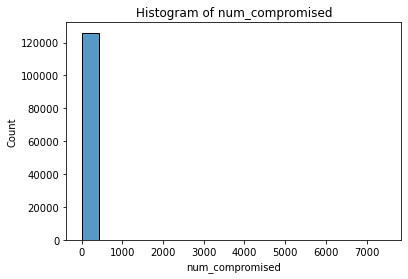

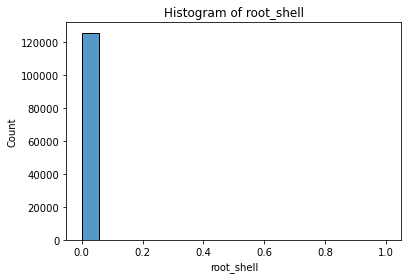

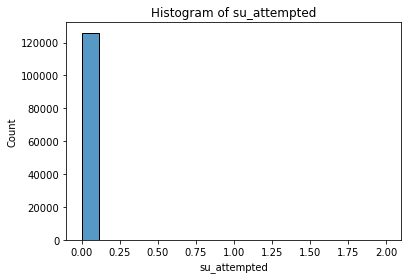

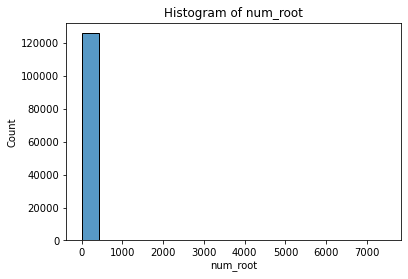

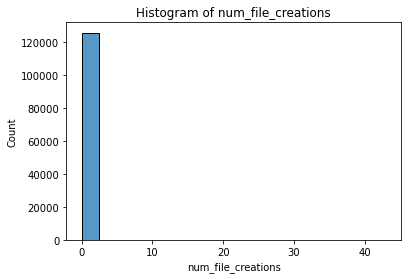

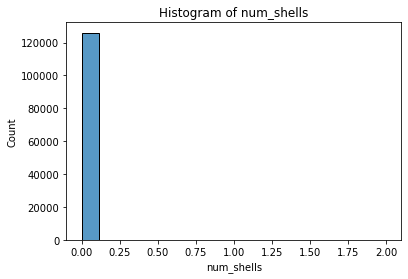

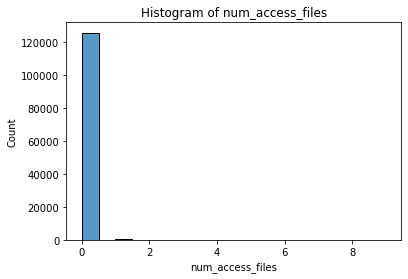

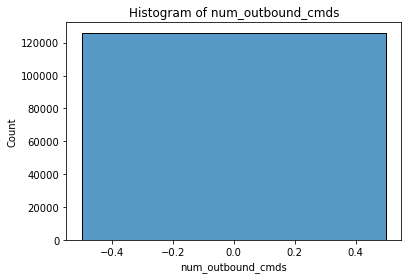

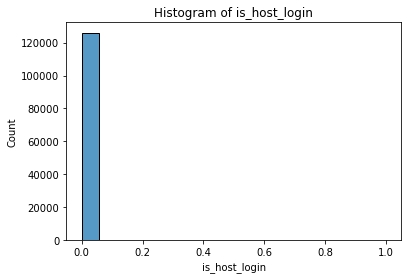

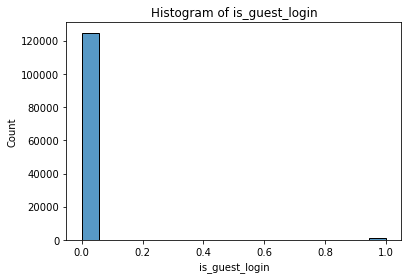

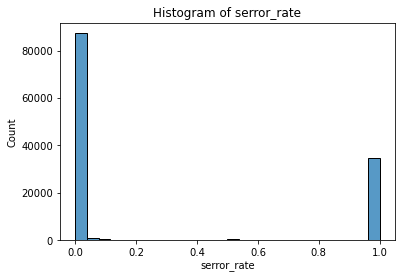

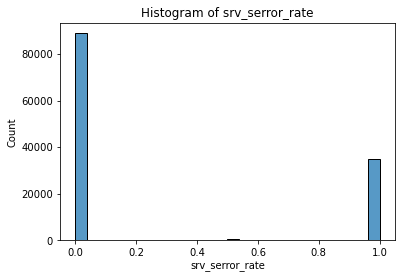

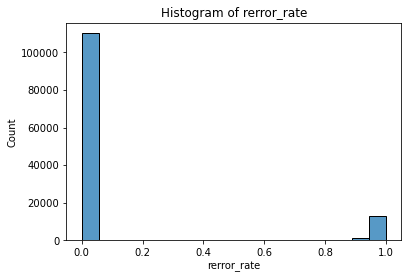

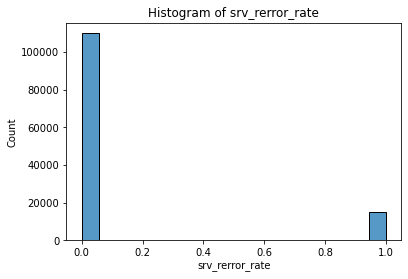

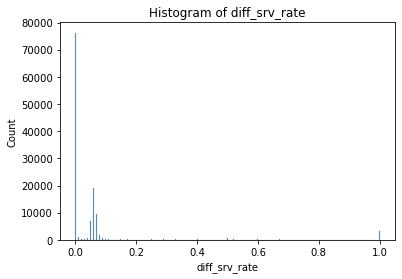

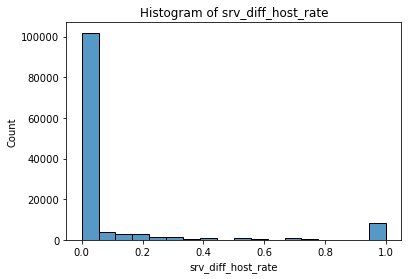

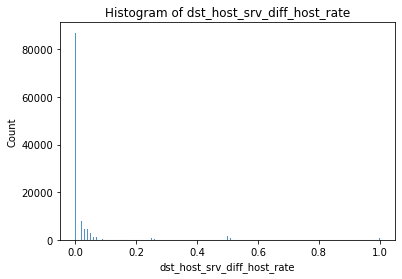

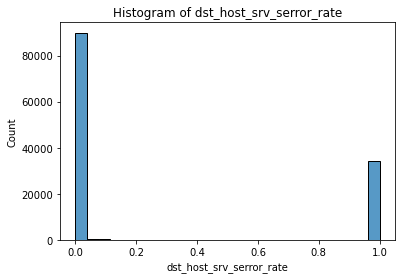

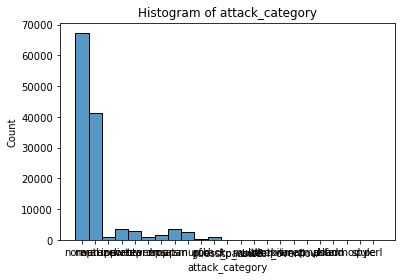

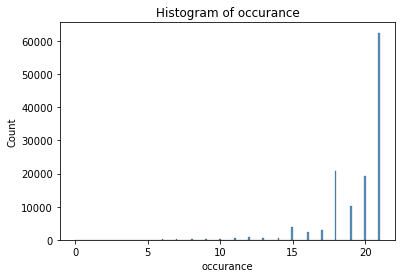

In [11]:
# create histograms for all columns
for column in df.columns:
    unique_count = df[column].nunique()
    if unique_count <= 100:
        sns.histplot(df[column], kde=False)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.show()

# 2. Performing data preprocessing on the dataset 

### Converting dataset from 23  to 5-classes.

In [12]:
Attack_Category = attack_types['attack_category'].tolist()
for i in range(len(Attack_Category)):
    Attack_Category[i] = Attack_Category[i].strip()
    
Attack_Category

Attack_Type = attack_types['attack_type'].tolist()
for i in range(len(Attack_Type)):
    Attack_Type[i] = Attack_Type[i].strip()
Attack_Type



attack_dict = {}
for i in range(len(Attack_Category)):
    attack_dict[Attack_Category[i]] = Attack_Type[i]
print(len(attack_dict))
print(attack_dict)

39
{'apache2': 'dos', 'back': 'dos', 'mailbomb': 'dos', 'processtable': 'dos', 'snmpgetattack': 'dos', 'teardrop': 'dos', 'smurf': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'udpstorm': 'dos', 'ps': 'u2r', 'buffer_overflow': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'loadmodule': 'u2r', 'xterm': 'u2r', 'sqlattack': 'u2r', 'httptunnel': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'snmpguess': 'r2l', 'imap': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'named': 'r2l', 'sendmail': 'r2l', 'xlock': 'r2l', 'xsnoop': 'r2l', 'worm': 'probe', 'nmap': 'probe', 'ipsweep': 'probe', 'portsweep': 'probe', 'satan': 'probe', 'mscan': 'probe', 'saint': 'probe'}


In [13]:
unique_attacks = df['attack_category'].unique()
unique_attacks

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [14]:
# Get unique attack categories from the dataset
unique_attacks = df['attack_category'].unique()

Dict = {}
# Create a list to store the attack types for each row in the dataset
for attack in unique_attacks:
    if attack in attack_dict:
        value = attack_dict[attack]
        Dict.update({attack: value})
Dict



{'neptune': 'dos',
 'warezclient': 'r2l',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'teardrop': 'dos',
 'nmap': 'probe',
 'satan': 'probe',
 'smurf': 'dos',
 'pod': 'dos',
 'back': 'dos',
 'guess_passwd': 'r2l',
 'ftp_write': 'r2l',
 'multihop': 'r2l',
 'rootkit': 'u2r',
 'buffer_overflow': 'u2r',
 'imap': 'r2l',
 'warezmaster': 'r2l',
 'phf': 'r2l',
 'land': 'dos',
 'loadmodule': 'u2r',
 'spy': 'r2l',
 'perl': 'u2r'}

In [15]:
df['attack_type'] = df['attack_category'].map(Dict)
df['attack_type'] = df['attack_type'].fillna('normal')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos


### Converting categorical to numeric 

In [16]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate through each column in the dataframe
for col in df.columns:
    if df[col].dtype == 'object':
        # If the column contains categorical values, apply label encoding
        df[col] = le.fit_transform(df[col])
df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,1,20,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20,1
1,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15,1
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9,20,0
125969,8,2,49,9,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11,21,1
125970,0,1,54,9,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11,18,1
125971,0,1,30,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,20,0


### Handling null values

In [17]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Handling missing values

In [18]:
# check for NaN values in the DataFrame
print(df.isna().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Handling duplicate values

In [19]:
# Check for duplicates in the dataframe
duplicates = df.duplicated()

# Print the number of duplicates
print("Number of duplicates: ", duplicates.sum())


Number of duplicates:  0


### Checking outliers

In [20]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,1,20,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20,1
1,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15,1
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9,20,0
125969,8,2,49,9,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11,21,1
125970,0,1,54,9,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11,18,1
125971,0,1,30,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,20,0


### Feature scaling.

In [21]:
target = df.pop('attack_type')

target

0         1
1         1
2         0
3         1
4         1
         ..
125968    0
125969    1
125970    1
125971    0
125972    1
Name: attack_type, Length: 125973, dtype: int32

In [22]:

# loop through each column and get the unique values
for column in df.columns:
    unique_values = df[column].unique()
    #if len(unique_values) < 50:
    print(f"Column '{column}' has {len(unique_values)} unique values: {unique_values}")


Column 'duration' has 2981 unique values: [    0  5607   507 ...  5430 11680   679]
Column 'protocol_type' has 3 unique values: [1 2 0]
Column 'service' has 70 unique values: [20 44 49 24 51 36 38 14 35 60 18 12 58 67  2 54  7 66 37 65  4 11 19  5
 32 15 21 68 59 26 16 69 28 29 13 30 33 57 34 31 55 63 23 17 43 10 42  6
  8 56  9 53 40 47 41  0 46 48 62 45 50 39 52  1 64 27  3 25 61 22]
Column 'flag' has 11 unique values: [ 9  5  1  4 10  2  6  3  8  7  0]
Column 'src_bytes' has 3341 unique values: [  491   146     0 ...  2816 11466  2358]
Column 'dst_bytes' has 9326 unique values: [    0  8153   420 ...  5424 17655 52866]
Column 'land' has 2 unique values: [0 1]
Column 'wrong_fragment' has 3 unique values: [0 3 1]
Column 'urgent' has 4 unique values: [0 1 3 2]
Column 'hot' has 28 unique values: [ 0  5  6  4  2  1 28 30 22 24 14  3 15 25 19 18 77 17 11  7 20 12  9 10
  8 21 33 44]
Column 'num_failed_logins' has 6 unique values: [0 2 1 3 4 5]
Column 'logged_in' has 2 unique values: [0 1]

Column 'dst_host_same_src_port_rate' has 101 unique values: [0.17 0.88 0.   0.03 0.12 1.   0.01 0.02 0.11 0.28 0.05 0.99 0.31 0.04
 0.25 0.58 0.46 0.55 0.78 0.14 0.86 0.71 0.1  0.33 0.5  0.2  0.97 0.09
 0.83 0.32 0.06 0.13 0.19 0.18 0.36 0.08 0.95 0.15 0.56 0.64 0.07 0.51
 0.6  0.45 0.27 0.82 0.16 0.63 0.9  0.87 0.35 0.23 0.7  0.96 0.24 0.94
 0.42 0.92 0.26 0.54 0.48 0.67 0.74 0.4  0.77 0.98 0.3  0.53 0.47 0.29
 0.49 0.65 0.84 0.44 0.22 0.73 0.38 0.66 0.57 0.85 0.75 0.61 0.89 0.41
 0.8  0.62 0.37 0.52 0.68 0.93 0.72 0.79 0.39 0.91 0.69 0.76 0.34 0.21
 0.81 0.43 0.59]
Column 'dst_host_srv_diff_host_rate' has 75 unique values: [0.   0.04 0.03 0.2  0.02 1.   0.14 0.51 0.01 0.18 0.26 0.09 0.05 0.15
 0.1  0.21 0.07 0.19 0.53 0.33 0.11 0.25 0.06 0.5  0.56 0.24 0.55 0.08
 0.54 0.67 0.13 0.12 0.23 0.38 0.52 0.22 0.43 0.17 0.39 0.16 0.3  0.31
 0.28 0.45 0.4  0.27 0.35 0.29 0.6  0.32 0.8  0.34 0.75 0.44 0.57 0.48
 0.97 0.37 0.46 0.36 0.42 0.49 0.86 0.73 0.64 0.58 0.47 0.41 0.62 0.93
 0.71 0.88 0

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,-0.110249,-0.124706,-0.686785,0.751111,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.142074,0.216426
1,-0.110249,2.219312,0.781428,0.751111,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074,-1.965556
2,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630,-0.219970
3,-0.110249,-0.124706,-0.442083,0.751111,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.142074,0.652823
4,-0.110249,-0.124706,-0.442083,0.751111,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074,0.652823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630,0.216426
125969,-0.107178,2.219312,1.087305,0.751111,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074,0.652823
125970,-0.110249,-0.124706,1.393183,0.751111,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,0.142074,-0.656367
125971,-0.110249,-0.124706,-0.075030,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630,0.216426


In [24]:

# loop through each column and get the unique values
for column in df.columns:
    unique_values = df[column].unique()
    #if len(unique_values) < 50:
    print(f"Column '{column}' has {len(unique_values)} unique values: {unique_values}")


Column 'duration' has 2981 unique values: [-0.11024922  2.04255911  0.08441349 ...  1.97459994  4.37428819
  0.15045291]
Column 'protocol_type' has 3 unique values: [-0.12470616  2.21931185 -2.46872416]
Column 'service' has 70 unique values: [-0.68678521  0.78142753  1.08730518 -0.44208309  1.20965624  0.29202328
  0.41437434 -1.05383839  0.23084775  1.76023602 -0.80913627 -1.17618945
  1.63788495  2.18846473 -1.78794476  1.39318283 -1.4820671   2.1272892
  0.35319881  2.06611367 -1.6655937  -1.23736498 -0.74796074 -1.60441817
  0.04732116 -0.99266286 -0.62560968  2.24964026  1.69906048 -0.31973202
 -0.93148733  2.31081579 -0.19738096 -0.13620543 -1.11501392 -0.0750299
  0.10849669  1.57670942  0.16967222 -0.01385437  1.45435836  1.94376261
 -0.50325862 -0.8703118   0.720252   -1.29854051  0.65907646 -1.54324264
 -1.42089157  1.51553389 -1.35971604  1.3320073   0.5367254   0.96495412
  0.59790093 -1.91029582  0.90377859  1.02612965  1.88258708  0.84260306
  1.14848071  0.47554987  1.27

Column 'dst_host_count' has 256 unique values: [-3.24063093e-01  7.34342561e-01 -1.53366955e+00 -1.75543074e+00
 -1.81591106e+00 -9.18786270e-01 -1.82599112e+00 -1.17078762e+00
 -2.53502716e-01  5.62981646e-01 -9.59106485e-01 -1.40262885e+00
 -1.74535068e+00 -1.42278896e+00 -1.15814236e-02 -1.79575095e+00
 -5.15584116e-01 -1.57398977e+00 -6.06304600e-01 -7.20617467e-02
 -7.37345300e-01  5.42821538e-01 -1.62439004e+00 -9.89346647e-01
 -1.39254880e+00 -1.35222858e+00 -1.42622124e-01 -1.59414988e+00
 -5.96224547e-01 -1.11030729e+00 -6.56704870e-01 -2.63582770e-01
  6.13381915e-01 -1.76551079e+00 -2.93822931e-01  6.03301861e-01
 -1.73527063e+00 -1.60422993e+00 -1.77559085e+00 -1.80583101e+00
 -7.57505408e-01  1.29539330e-01 -4.45023739e-01 -6.19816928e-02
 -1.78567090e+00 -8.88546108e-01 -7.47425354e-01 -1.33206848e+00
 -1.72519058e+00 -1.52358950e+00 -1.56390972e+00 -9.99426700e-01
  2.87387918e-02  1.39619384e-01 -8.38145839e-01 -1.14054745e+00
 -1.65463020e+00 -6.46624816e-01  6.5370213

# 3- Performing feature engineering:

In [25]:
# concatenate the target column with the feature dataframe
df = pd.concat([df, target], axis=1)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,-0.110249,-0.124706,-0.686785,0.751111,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.142074,0.216426,1
1,-0.110249,2.219312,0.781428,0.751111,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074,-1.965556,1
2,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630,-0.219970,0
3,-0.110249,-0.124706,-0.442083,0.751111,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.142074,0.652823,1
4,-0.110249,-0.124706,-0.442083,0.751111,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074,0.652823,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630,0.216426,0
125969,-0.107178,2.219312,1.087305,0.751111,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074,0.652823,1
125970,-0.110249,-0.124706,1.393183,0.751111,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,0.142074,-0.656367,1
125971,-0.110249,-0.124706,-0.075030,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630,0.216426,0


###  Identifying  most relevant features for classification using technique  correlation analysis.

In [26]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
corr_matrix


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
duration,1.000000,0.038241,0.092858,-0.063390,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,...,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,0.134590,-0.156311,0.161693
protocol_type,0.038241,1.000000,0.029994,0.093668,-0.000974,-0.000608,-0.001757,0.169535,-0.000965,-0.011857,...,0.131380,-0.209105,-0.356183,-0.079398,-0.077925,-0.015434,-0.046938,0.135203,0.082775,0.034215
service,0.092858,0.029994,1.000000,-0.304014,-0.001631,0.003596,-0.009952,0.084404,0.010980,-0.064066,...,0.284072,-0.111163,-0.156211,0.281635,0.277594,0.150666,0.148405,-0.001798,0.033724,-0.168909
flag,-0.063390,0.093668,-0.304014,1.000000,-0.008114,-0.004096,-0.010373,0.067214,0.005811,0.068437,...,-0.283607,0.195689,0.073773,-0.443441,-0.443225,-0.683310,-0.718778,0.170749,0.054179,0.408193
src_bytes,0.070737,-0.000974,-0.001631,-0.008114,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,...,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.011617,-0.022592,0.013482
dst_bytes,0.034878,-0.000608,0.003596,-0.004096,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,...,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.007600,-0.018076,0.008763
land,-0.001553,-0.001757,-0.009952,-0.010373,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,...,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.017239,-0.037038,-0.010021
wrong_fragment,-0.009866,0.169535,0.084404,0.067214,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,...,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,0.304125,-0.157130,-0.101976
urgent,0.003830,-0.000965,0.010980,0.005811,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,...,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.003513,-0.016411,0.010625
hot,0.000705,-0.011857,-0.064066,0.068437,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,...,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,0.098611,-0.160013,0.121760


In [27]:
# Sort the correlation values with respect to the target variable
target_corr = corr_matrix['attack_type'].sort_values(ascending=False)
target_corr

attack_type                    1.000000
same_srv_rate                  0.626292
dst_host_same_srv_rate         0.465241
dst_host_same_src_port_rate    0.446731
flag                           0.408193
attack_category                0.370975
dst_host_srv_diff_host_rate    0.359947
logged_in                      0.342547
dst_host_srv_count             0.337510
srv_diff_host_rate             0.299656
dst_host_diff_srv_rate         0.279212
duration                       0.161693
diff_srv_rate                  0.137083
hot                            0.121760
is_guest_login                 0.116850
dst_host_srv_rerror_rate       0.081817
srv_rerror_rate                0.080794
rerror_rate                    0.078432
dst_host_rerror_rate           0.048769
root_shell                     0.044154
num_failed_logins              0.042482
protocol_type                  0.034215
num_shells                     0.023135
num_access_files               0.018890
num_file_creations             0.015557


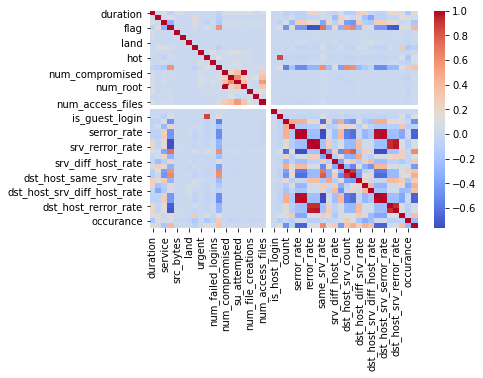

In [28]:
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

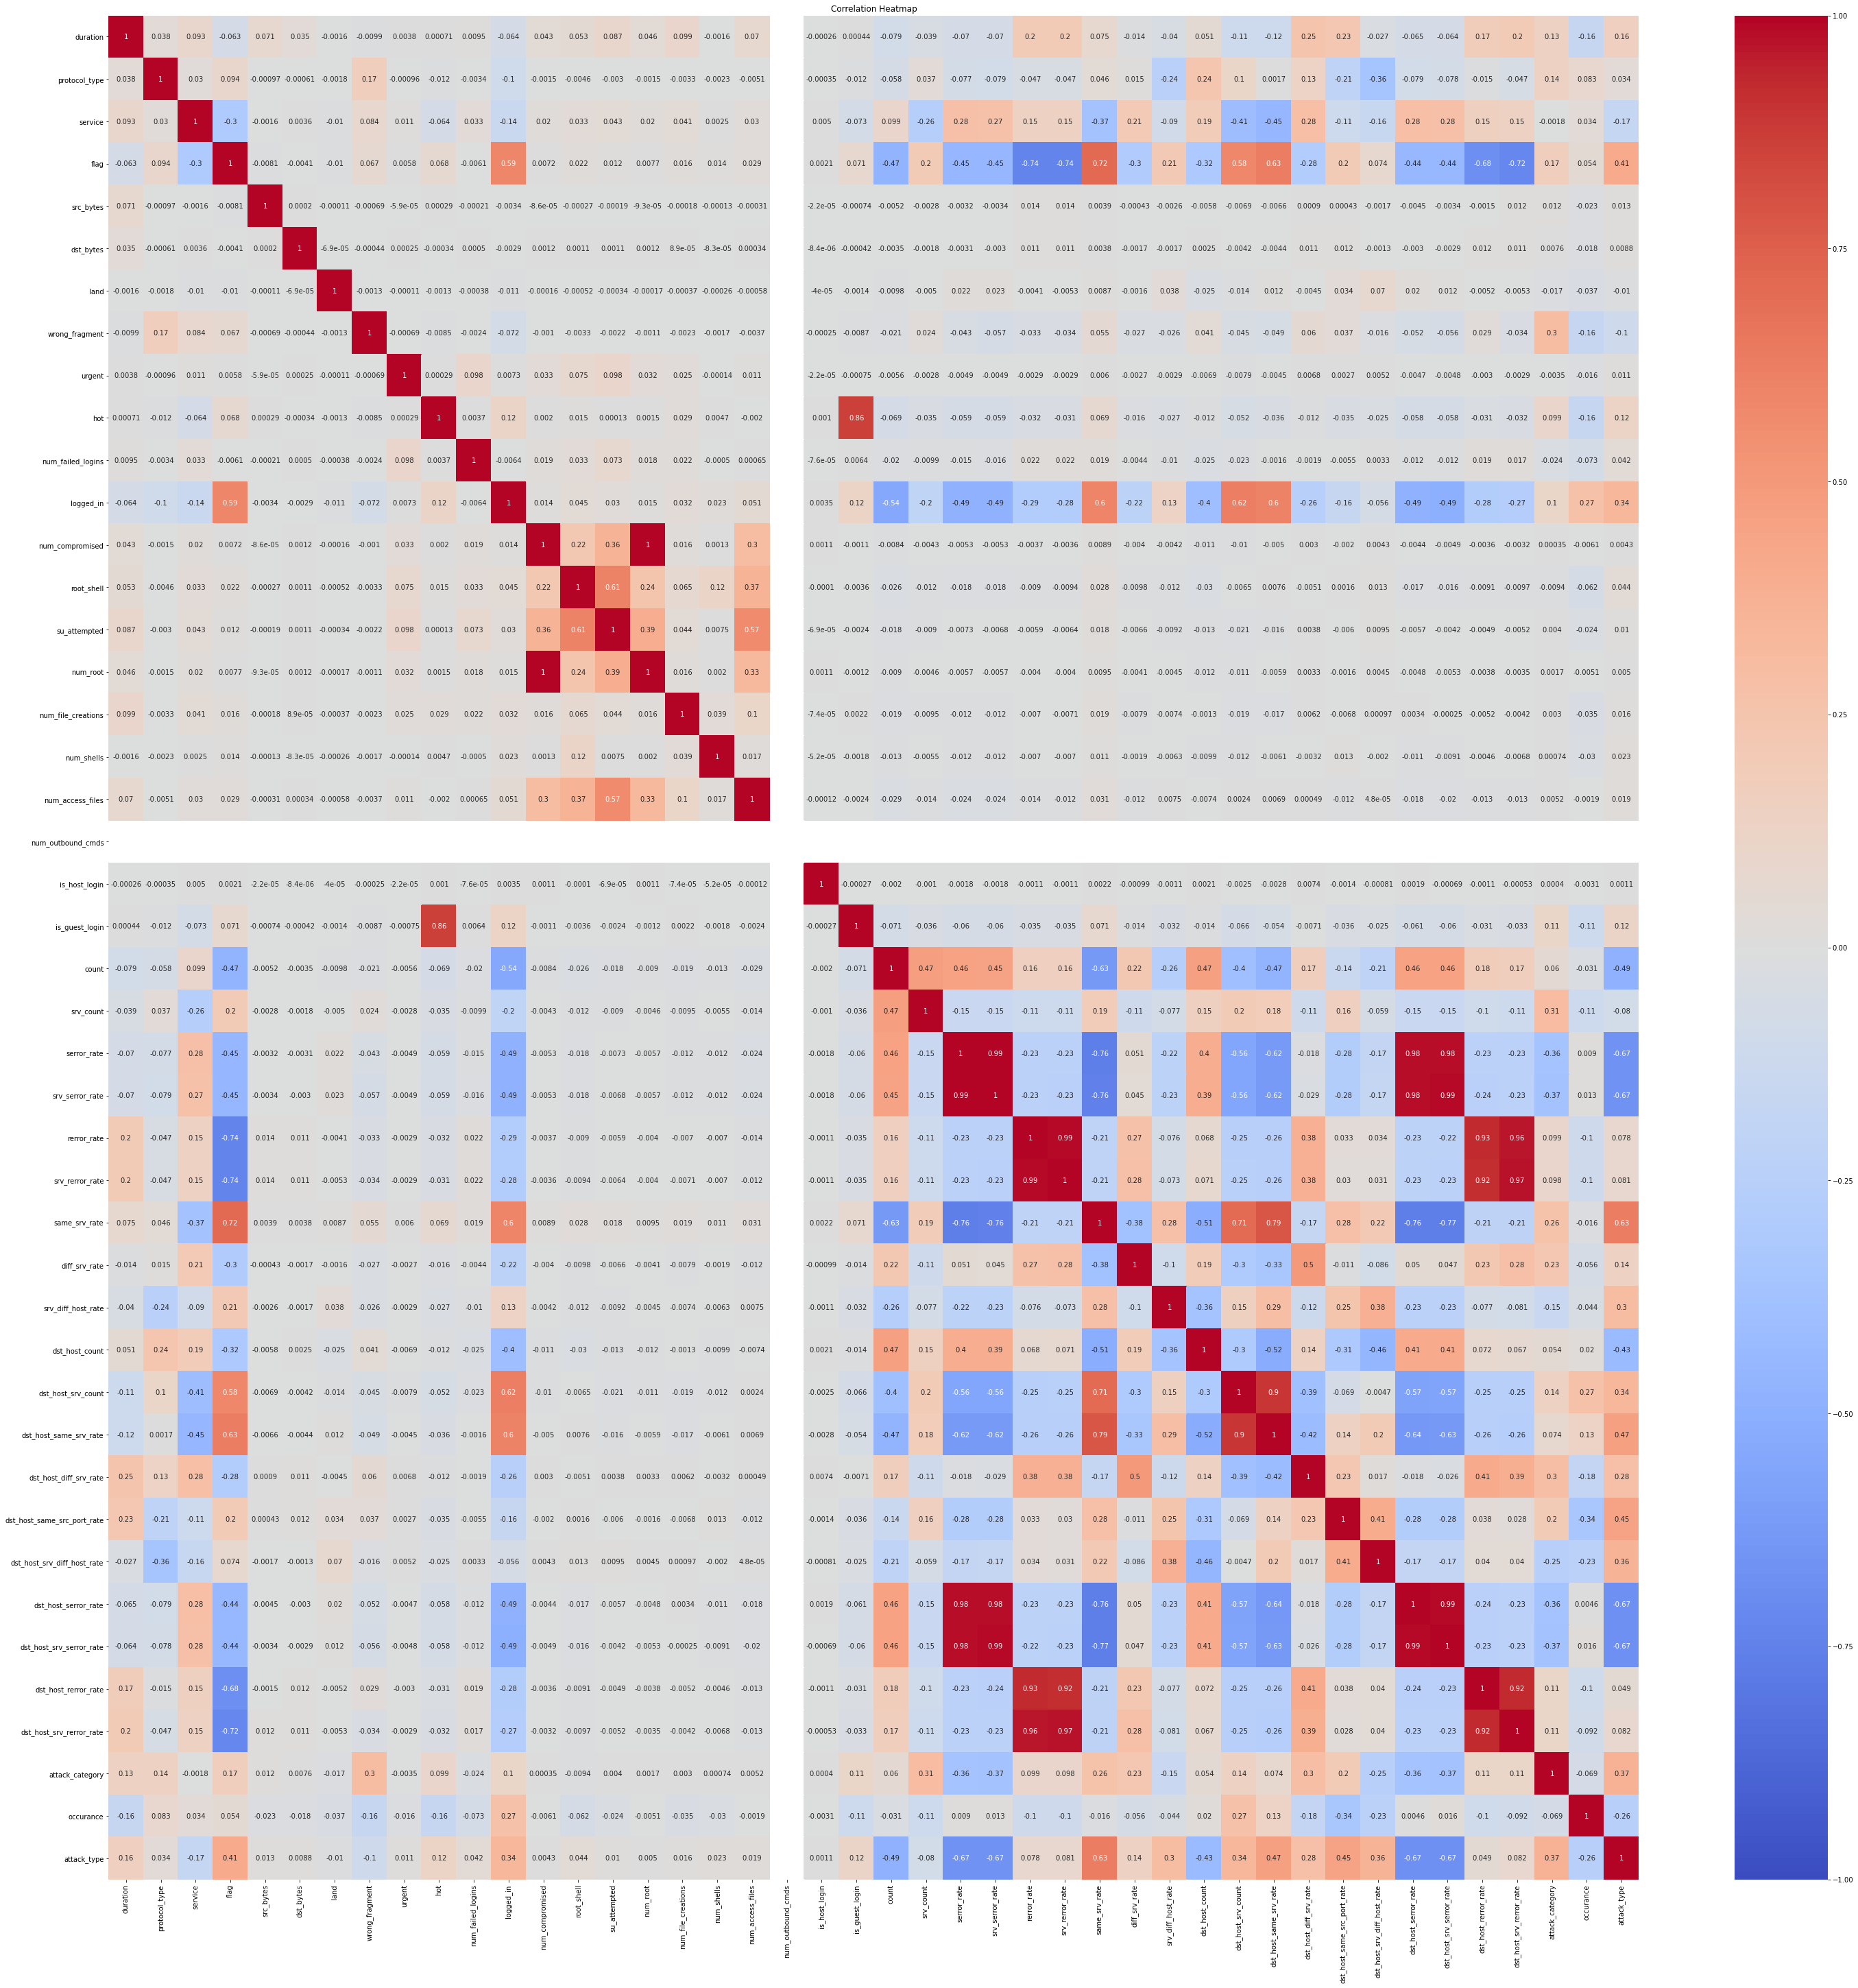

In [29]:

# Plot the heatmap
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


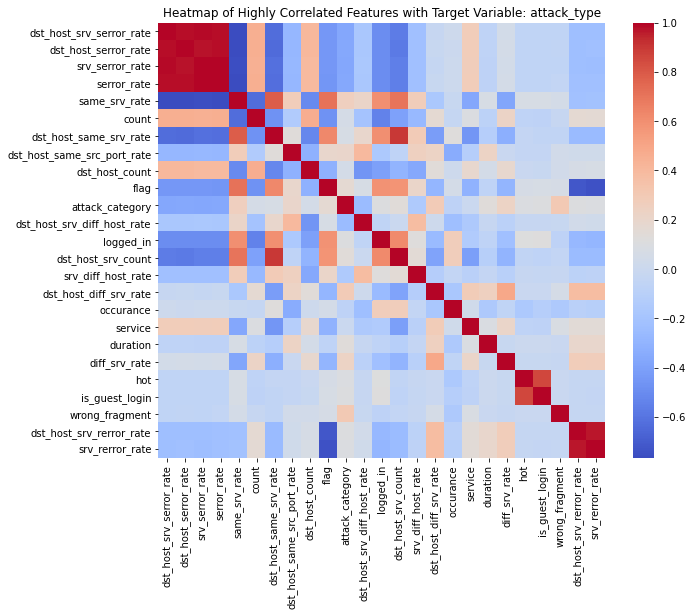

In [30]:
 
# Get the k most highly correlated features with the target variable
k = 25 # Change this value to the desired number of features
target_variable = 'attack_type' # Change this value to the name of your target variable
target_corr = corr_matrix[target_variable].drop(target_variable)
high_corr_features = target_corr.abs().nlargest(k)

# Create a dictionary of the feature names and their correlation coefficients
corr_dict = dict(high_corr_features)

# Create a heatmap of the highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df[high_corr_features.index].corr(), cmap='coolwarm')
plt.title('Heatmap of Highly Correlated Features with Target Variable: {}'.format(target_variable))
plt.show()






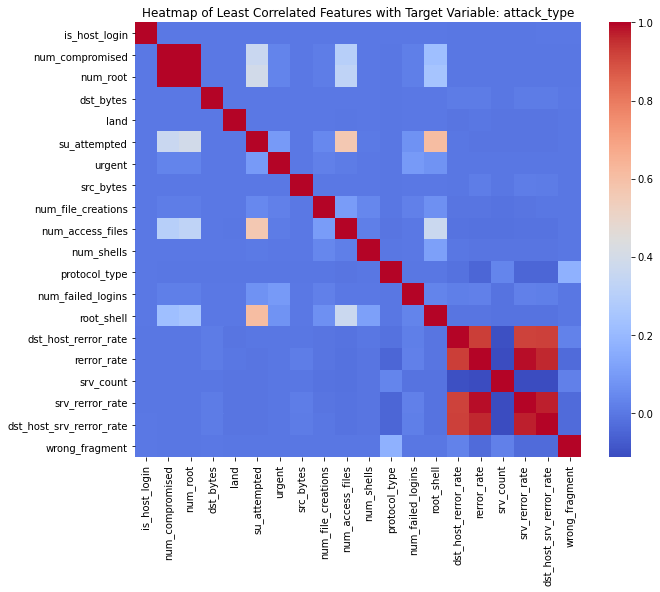

In [31]:
# Get the k most highly correlated features with the target variable
k = 20 # Change this value to the desired number of features
target_variable = 'attack_type' # Change this value to the name of your target variable
target_corr = corr_matrix[target_variable].drop(target_variable)

# Get the k least correlated features with the target variable
low_corr_features = target_corr.abs().nsmallest(k)

# Create a dictionary of the feature names and their correlation coefficients
corr_dict = dict(low_corr_features)

# Create a heatmap of the least correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df[low_corr_features.index].corr(), cmap='coolwarm')
plt.title('Heatmap of Least Correlated Features with Target Variable: {}'.format(target_variable))
plt.show()


### Dropping features having less correlation

In [32]:

# Create a list of columns to be dropped
to_drop = ['num_outbound_cmds','is_host_login','num_compromised','num_root','dst_bytes','land','su_attempted','urgent','num_file_creations','num_access_files','num_shells','protocol_type','num_failed_logins','root_shell','dst_host_rerror_rate','rerror_rate','srv_rerror_rate','dst_host_srv_rerror_rate','wrong_fragment']

# Save the dropped columns to a new DataFrame
dropped_df = df[to_drop]

# Drop the specified columns from the original DataFrame
df.drop(columns=to_drop, inplace=True)

# Check the resulting DataFrames
print("Original DataFrame:")
df



Original DataFrame:


,duration,service,flag,src_bytes,hot,logged_in,is_guest_login,count,srv_count,serror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_category,occurance,attack_type
0,-0.110249,-0.686785,0.751111,-0.007679,-0.095076,-0.809262,-0.097531,-0.717045,-0.354343,-0.637209,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,0.142074,0.216426,1
1,-0.110249,0.781428,0.751111,-0.007737,-0.095076,-0.809262,-0.097531,-0.620982,-0.368110,-0.637209,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,0.142074,-1.965556,1
2,-0.110249,1.087305,-0.736235,-0.007762,-0.095076,-0.809262,-0.097531,0.339648,-0.299273,1.602664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.616630,-0.219970,0
3,-0.110249,-0.442083,0.751111,-0.007723,-0.095076,1.235694,-0.097531,-0.690846,-0.313041,-0.189235,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,0.142074,0.652823,1
4,-0.110249,-0.442083,0.751111,-0.007728,-0.095076,1.235694,-0.097531,-0.472521,0.058678,-0.637209,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,0.142074,0.652823,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,1.087305,-0.736235,-0.007762,-0.095076,-0.809262,-0.097531,0.872361,-0.037694,1.602664,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.616630,0.216426,0
125969,-0.107178,1.087305,0.751111,-0.007744,-0.095076,-0.809262,-0.097531,-0.717045,-0.354343,-0.637209,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,0.142074,0.652823,1
125970,-0.110249,1.393183,0.751111,-0.007382,-0.095076,1.235694,-0.097531,-0.725778,-0.368110,-0.637209,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,0.142074,-0.656367,1
125971,-0.110249,-0.075030,-0.736235,-0.007762,-0.095076,-0.809262,-0.097531,0.523041,-0.271739,1.602664,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.616630,0.216426,0


In [33]:
print("\nDropped DataFrame:")
dropped_df.head()


Dropped DataFrame:


,num_outbound_cmds,is_host_login,num_compromised,num_root,dst_bytes,land,su_attempted,urgent,num_file_creations,num_access_files,num_shells,protocol_type,num_failed_logins,root_shell,dst_host_rerror_rate,rerror_rate,srv_rerror_rate,dst_host_srv_rerror_rate,wrong_fragment
0,0.0,-0.002817,-0.011664,-0.012385,-0.004919,-0.014089,-0.024437,-0.007736,-0.02618,-0.041221,-0.01861,-0.124706,-0.027023,-0.036652,-0.224532,-0.374362,-0.374432,-0.376387,-0.089486
1,0.0,-0.002817,-0.011664,-0.012385,-0.004919,-0.014089,-0.024437,-0.007736,-0.02618,-0.041221,-0.01861,2.219312,-0.027023,-0.036652,-0.387635,-0.374362,-0.374432,-0.376387,-0.089486
2,0.0,-0.002817,-0.011664,-0.012385,-0.004919,-0.014089,-0.024437,-0.007736,-0.02618,-0.041221,-0.01861,-0.124706,-0.027023,-0.036652,-0.387635,-0.374362,-0.374432,-0.376387,-0.089486
3,0.0,-0.002817,-0.011664,-0.012385,-0.002891,-0.014089,-0.024437,-0.007736,-0.02618,-0.041221,-0.01861,-0.124706,-0.027023,-0.036652,-0.387635,-0.374362,-0.374432,-0.345084,-0.089486
4,0.0,-0.002817,-0.011664,-0.012385,-0.004814,-0.014089,-0.024437,-0.007736,-0.02618,-0.041221,-0.01861,-0.124706,-0.027023,-0.036652,-0.387635,-0.374362,-0.374432,-0.376387,-0.089486


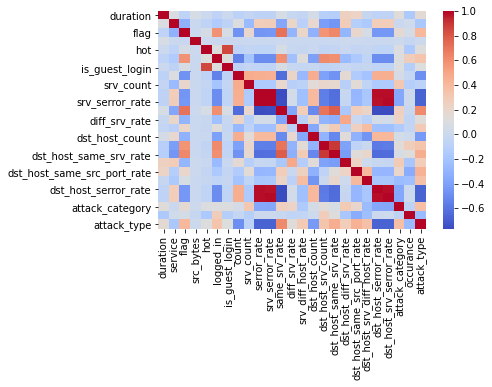

In [34]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

In [35]:
# check for NaN values in the DataFrame
print(df.isna().sum())

duration                       0
service                        0
flag                           0
src_bytes                      0
hot                            0
logged_in                      0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
attack_category                0
occurance                      0
attack_type                    0
dtype: int64


In [36]:
# Check for duplicates in the dataframe
duplicates = df.duplicated()

# Print the number of duplicates
print("Number of duplicates: ", duplicates.sum())


Number of duplicates:  4123


In [37]:
# remove duplicates
df = df.drop_duplicates()

In [38]:
# Check for duplicates in the dataframe
duplicates = df.duplicated()

# Print the number of duplicates
print("Number of duplicates: ", duplicates.sum())


Number of duplicates:  0


In [39]:
# check for NaN values in the DataFrame
print(df.isna().sum())

duration                       0
service                        0
flag                           0
src_bytes                      0
hot                            0
logged_in                      0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
attack_category                0
occurance                      0
attack_type                    0
dtype: int64


In [40]:
unique_values = df['attack_type'].unique()
print(unique_values)

[1 0 3 2 4]


In [41]:

# Identify outliers using the IQR method

Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


# Print the number of outliers identified

print(f"Number of outliers in the dataset: {outliers.sum()}")

Number of outliers in the dataset: 66819


In [42]:
target = df.pop('attack_type')


# 4- Classification and clustering algorithms

# Tree

In [43]:
# target = df.pop('attack_type')


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with default hyperparameters
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)


Accuracy: 0.9997537956503898


In [44]:
Score =clf.score(X_train , y_train)
print(Score)

1.0


In [1]:
plt.figure(figsize=(62, 39))
plot_tree(clf, filled=True, feature_names=df.columns, fontsize=20)
plt.show()

NameError: name 'plt' is not defined

# KNN

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)



In [47]:

# Train the KNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)


In [48]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [49]:

# Make predictions on the test data
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 2]


In [50]:
print(pd.unique(target))

[1 0 3 2 4]


In [51]:

# Evaluate the model performance
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc:.2f}")


Accuracy score: 1.00


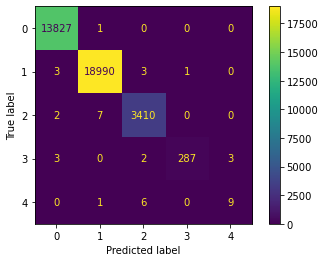

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13828
           1       1.00      1.00      1.00     18997
           2       1.00      1.00      1.00      3419
           3       1.00      0.97      0.98       295
           4       0.75      0.56      0.64        16

    accuracy                           1.00     36555
   macro avg       0.95      0.91      0.92     36555
weighted avg       1.00      1.00      1.00     36555

Accuracy: 0.9991246067569416
Precision: 0.9484520781932959
Recall: 0.9064616422041585
F1-Score: 0.9247498664345513


In [52]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

report = classification_report(y_test, y_pred)
print(report)

# evaluate the performance of the model using accuracy, precision, recall, and f1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))


# ANN

In [2]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

# initialize the MLPClassifier
mlp = MLPClassifier()


NameError: name 'train_test_split' is not defined

In [ ]:
# fit the model on the training data
mlp.fit(X_train, y_train)


In [55]:
# make predictions on the test data
y_pred = mlp.predict(X_test)


In [56]:
print(y_pred)

[1 1 1 ... 1 0 0]


In [57]:
# evaluate the performance of the model using accuracy, precision, recall, and f1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.9997537956503898
Precision: 0.9774710563892487
Recall: 0.9442696962054093
F1-Score: 0.9592527264654331


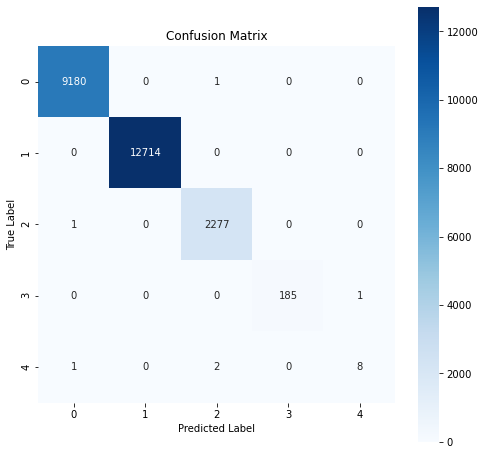

In [58]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, square=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# 5- Comparizon of Dicision Tree KNN and ANN 

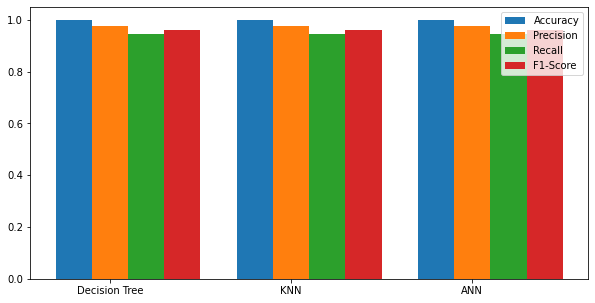

In [59]:
# Create a list of the model names
models = ['Decision Tree', 'KNN', 'ANN']

# Create a list of the performance metrics for each model
accuracy = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)]
precision = [precision_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred, average='macro')]
recall = [recall_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro')]
f1 = [f1_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')]

# Create a bar chart showing the performance metrics for each model
x_pos = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x_pos - width, accuracy, width, label='Accuracy')
ax.bar(x_pos, precision, width, label='Precision')
ax.bar(x_pos + width, recall, width, label='Recall')
ax.bar(x_pos + 2*width, f1, width, label='F1-Score')

ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.legend()

plt.show()


# Optimize the performance of the ANN model by tuning its Hyperparameters

# kmeans Clustering

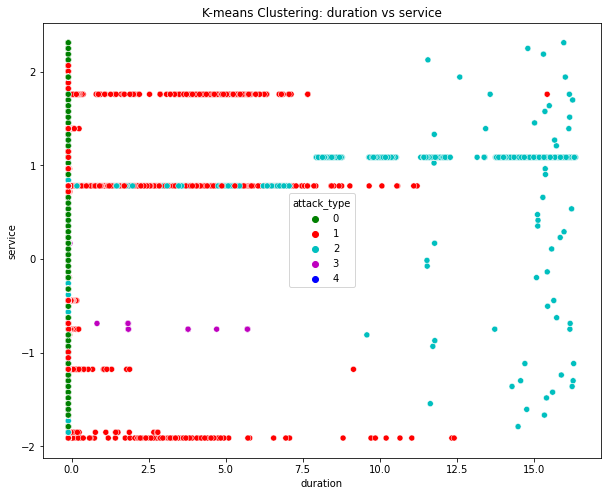

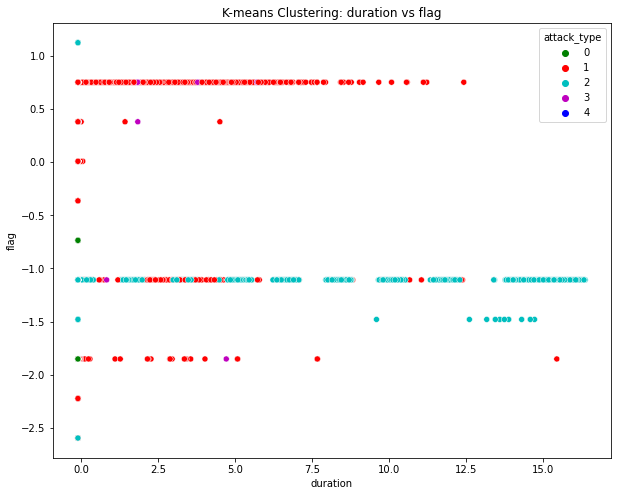

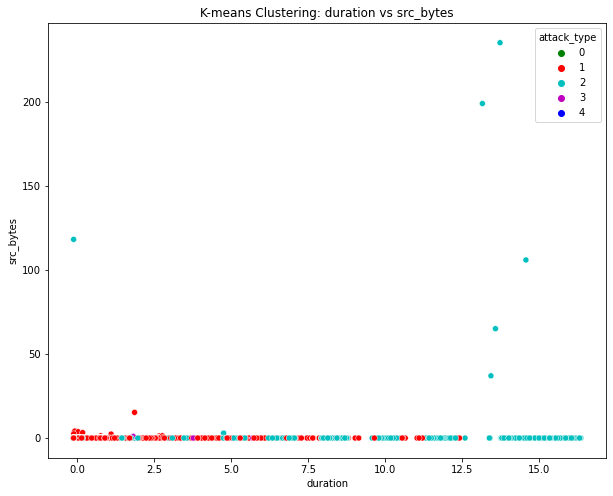

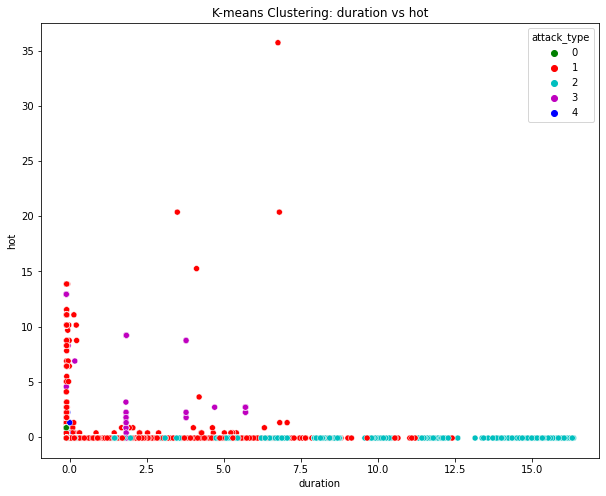

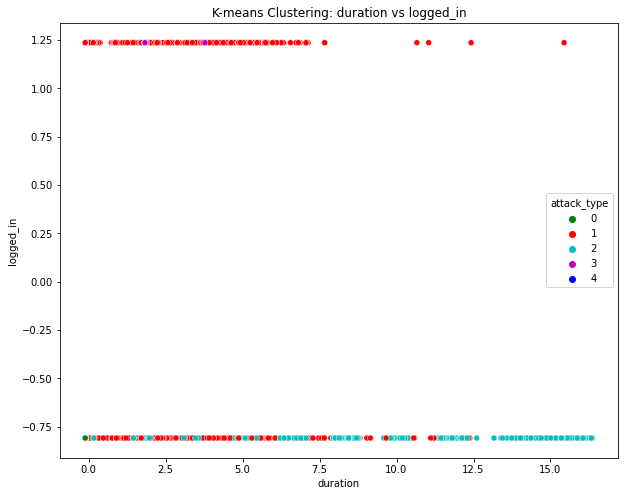

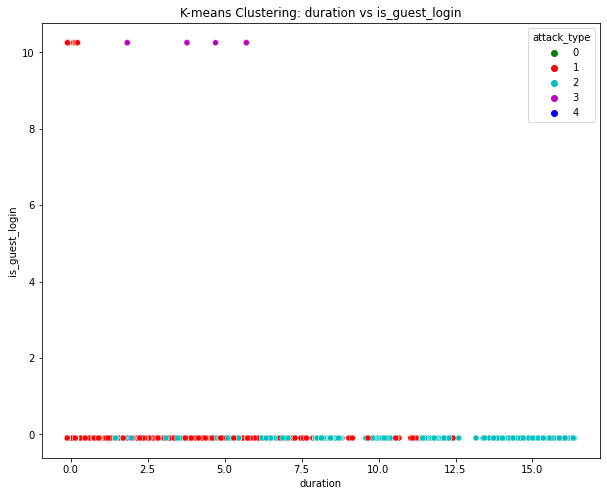

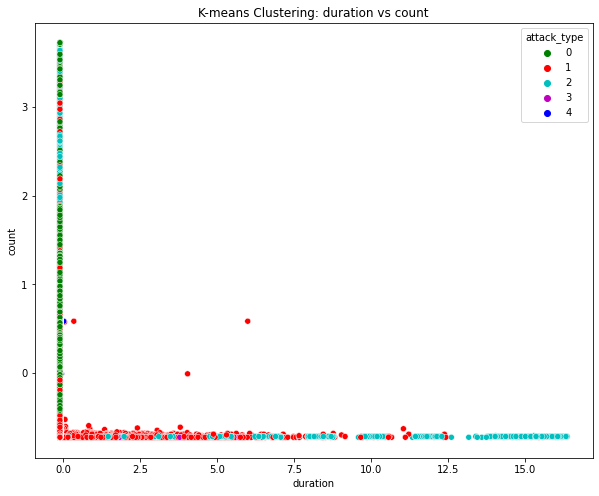

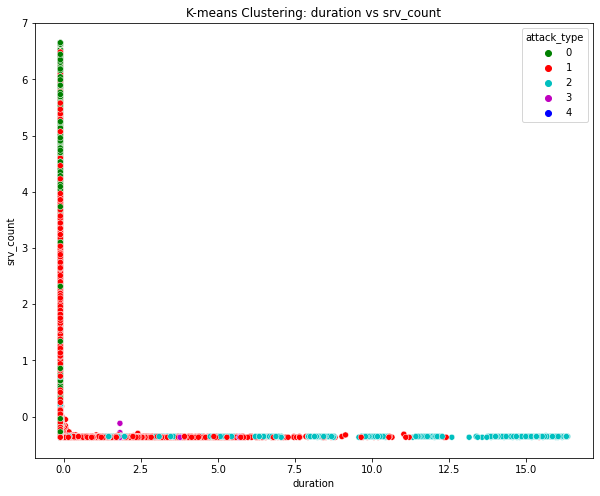

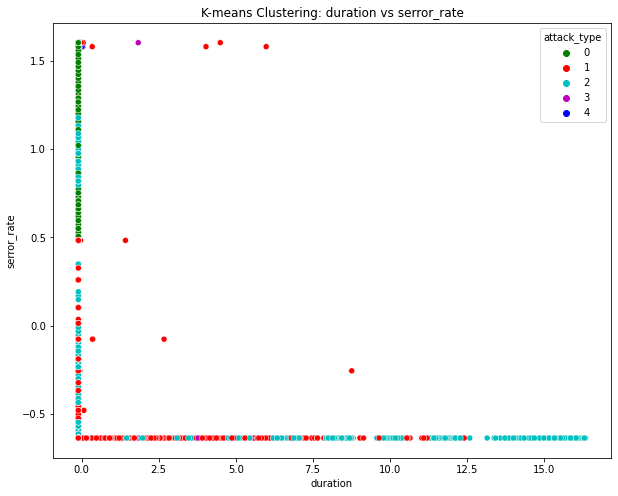

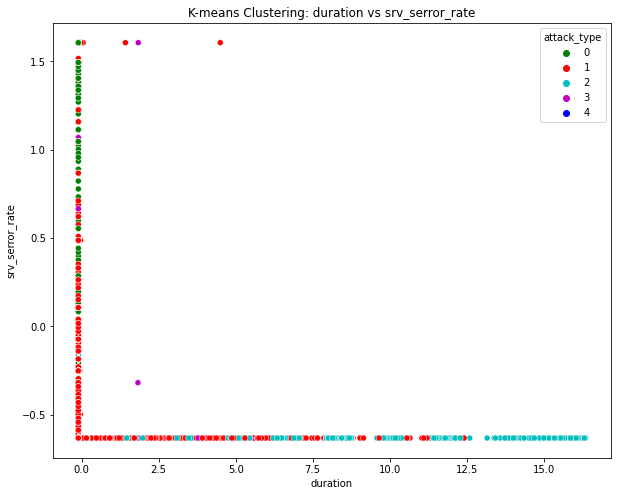

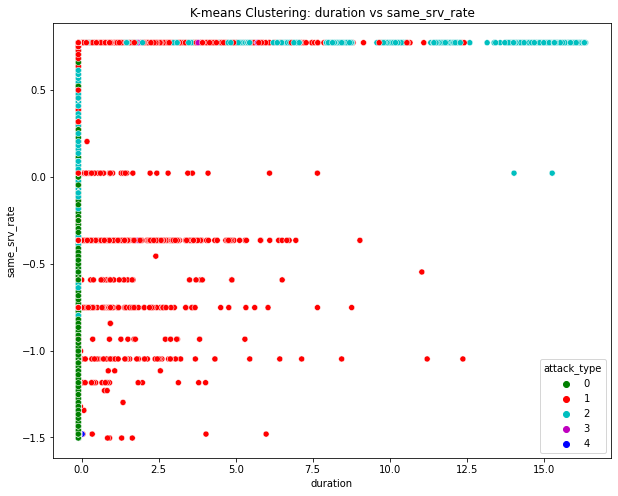

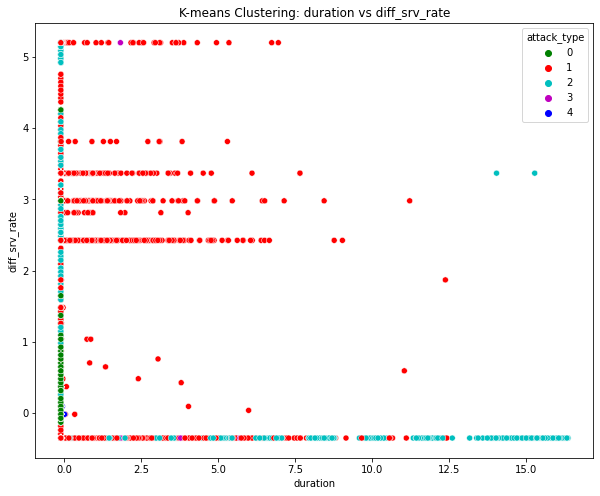

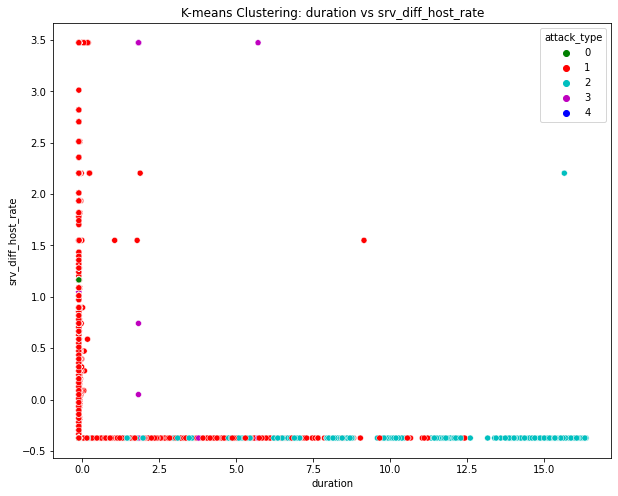

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


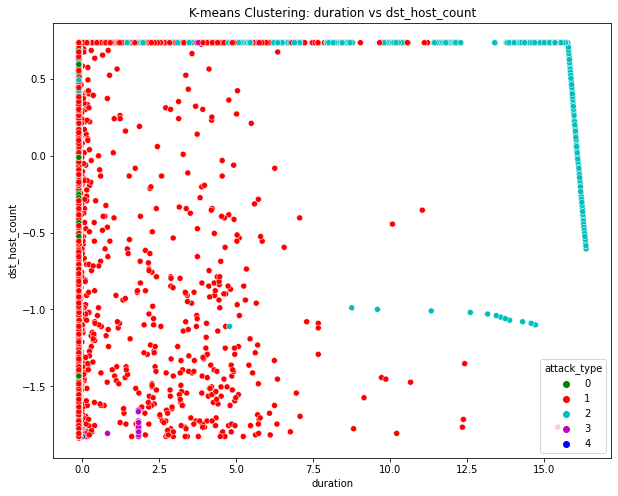

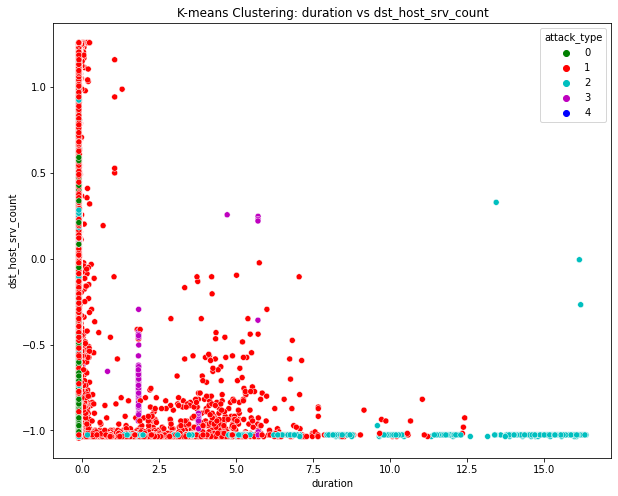

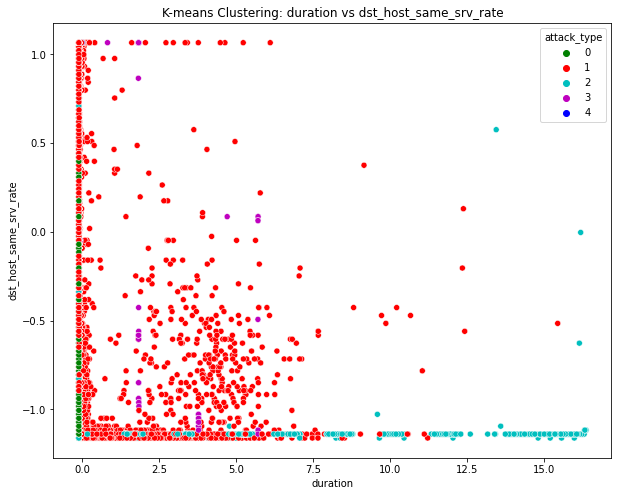

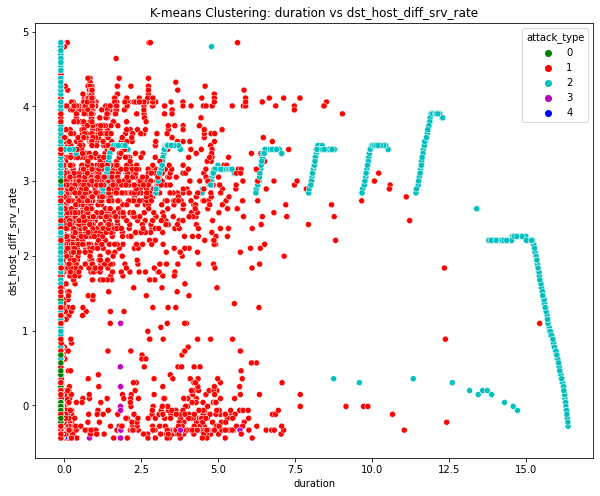

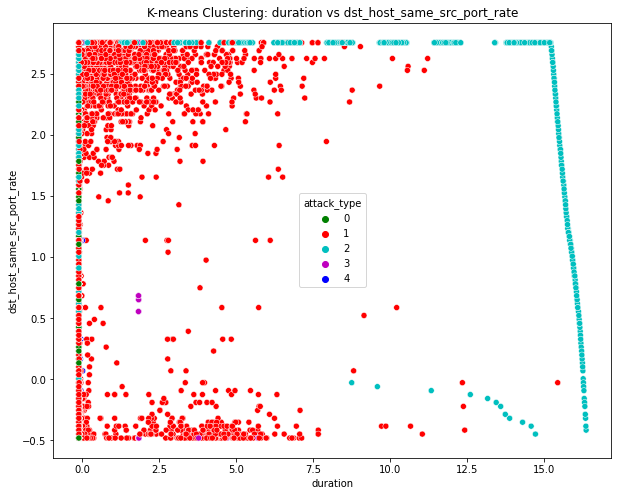

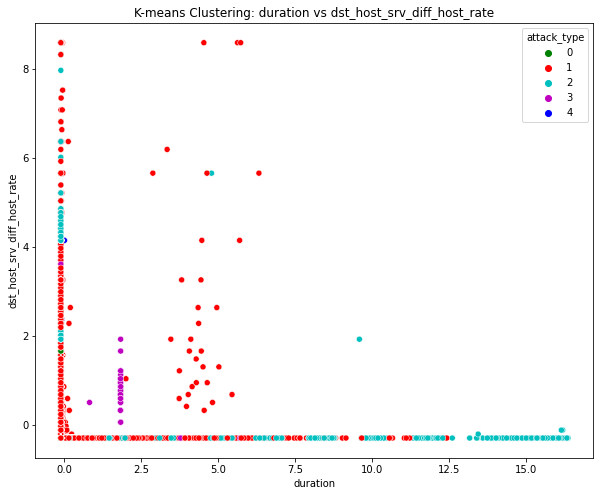

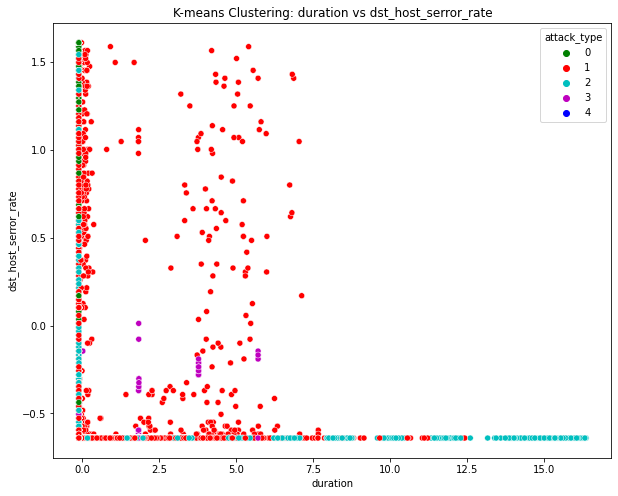

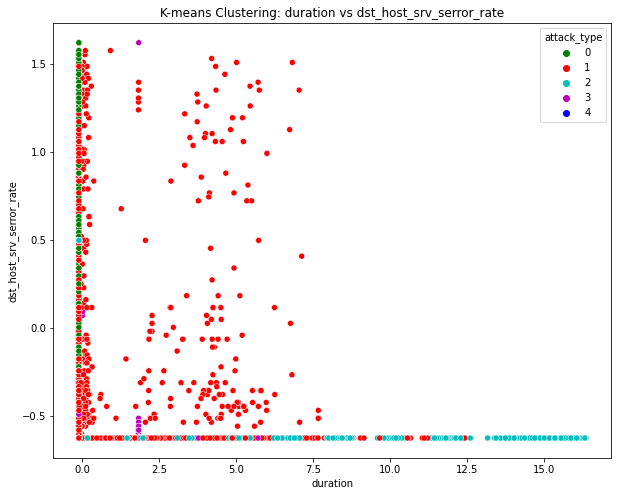

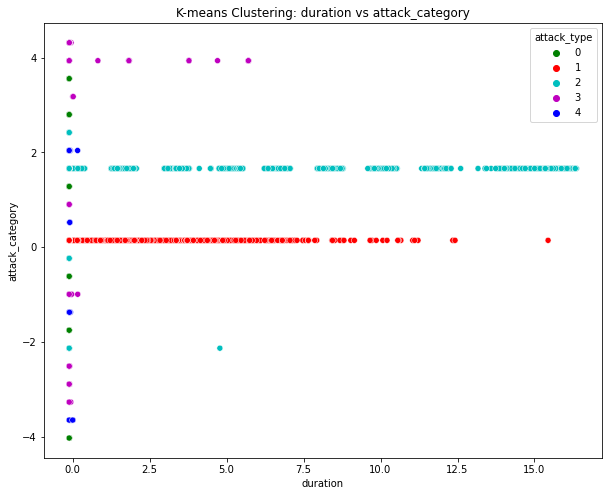

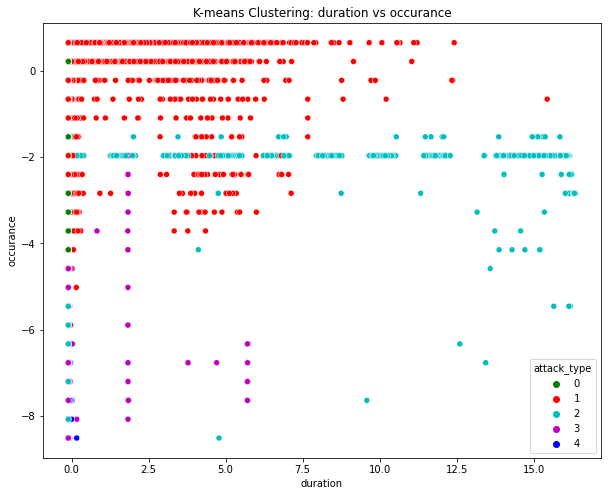

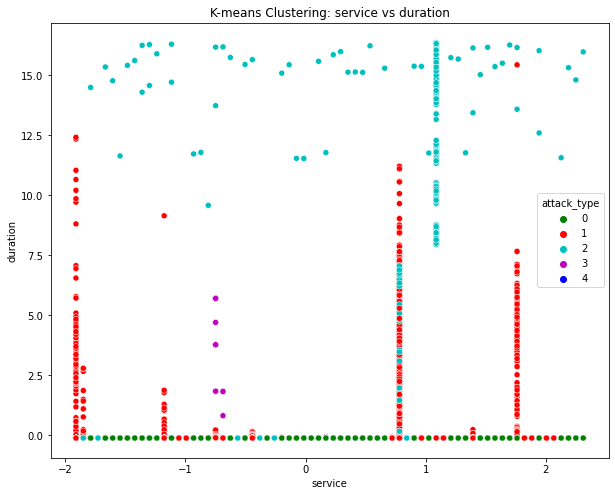

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


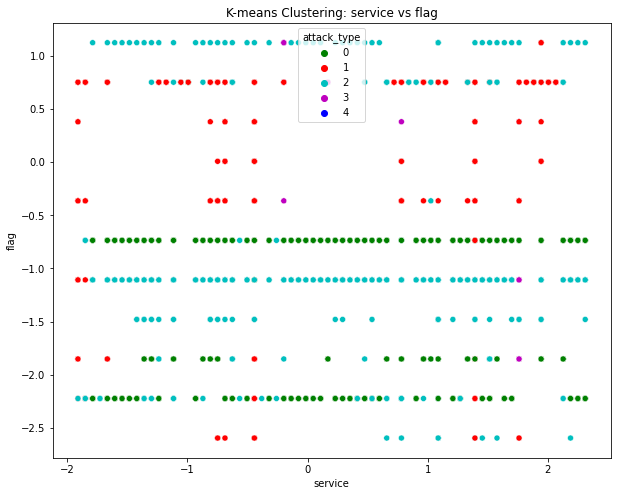

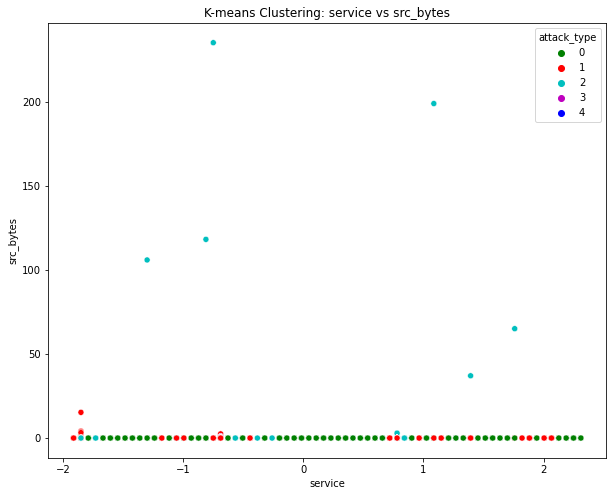

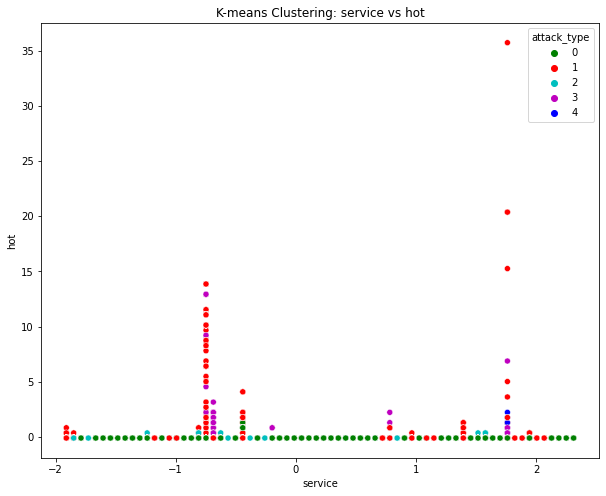

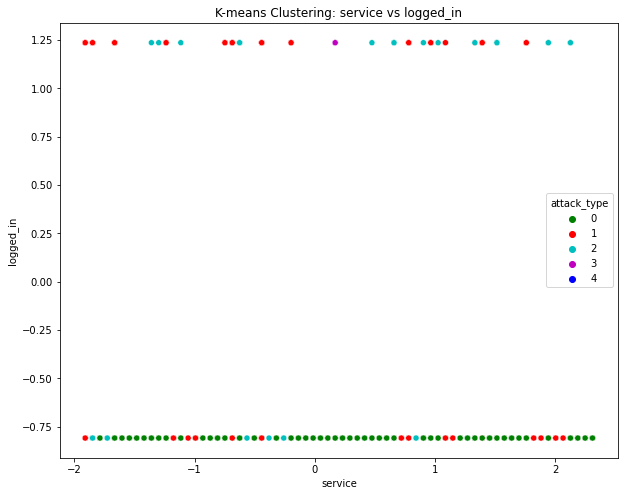

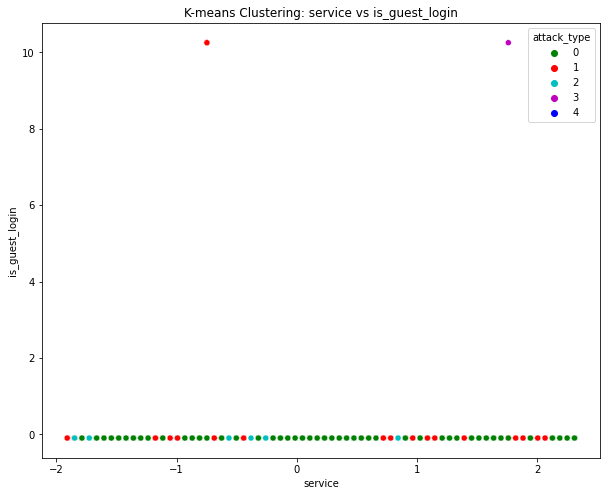

In [ ]:
# define the number of clusters
num_clusters = 5

# create a kmeans object
kmeans = KMeans(n_clusters=num_clusters)

# fit the kmeans object to the data
kmeans.fit(df)

# get the cluster labels
labels = kmeans.labels_

# create a list of all possible feature pairs
feature_pairs = [(i, t) for i in df.columns for t in df.columns if i != t]

# create a scatterplot for each feature pair
for pair in feature_pairs:
    x_axis = pair[0]
    y_axis = pair[1]
    
    # create scatterplot with cluster labels based on target variable
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=x_axis, y=y_axis, hue=target, data=df, palette=['g', 'r', 'c', 'm', 'b'])
    plt.title(f'K-means Clustering: {x_axis} vs {y_axis}')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()
